### Analyse de Sentiment

In [2]:
from transformers import pipeline
import pandas as pd

sentiment_pipeline=pipeline('sentiment-analysis', model = 'cardiffnlp/twitter-roberta-base-sentiment-latest')




c:\Users\JAN17\Documents\GPTW_Project\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use c

In [58]:
import pandas as pd
df = pd.read_excel('data/GPTW.xlsx', header=None)

comments = df[0].tolist()

sentiment_pipeline(comments)

comments_df = pd.DataFrame(comments, columns=['comments'])

In [59]:
comments_df

,comments
0,Everything is good
1,The increment policy - i think no matter how g...
2,Work From Home Policy
3,Team management
4,The policies for people working outside of the...
5,Management should foster a culture of trust by...
6,The first and foremost is the paycheck. The ma...
7,No reliable information stream (from the local...
8,"There are not enough desks for everybody, some..."
9,"The communication, implication, collaboration ..."


In [ ]:
def sentiment_analysis(comments):
    comments = comments[0].tolist()
    comments_df = pd.DataFrame(comments, columns=['comments'])

    results = []
    batch_size = 8  # adapte selon ta VRAM

    for i in range(0, len(comments_df), batch_size):
        batch = comments_df['comments'][i:i+batch_size].tolist()
        sentiments = sentiment_pipeline(batch, truncation=True, max_length=512)
        results.extend(sentiments)

    comments_df['sentiments'] = [res['label'] for res in results]
    return comments_df

In [15]:
df3 = pd.read_excel('data/Test.xlsx', header=None)
sentiment_analysis(df3)

,comments,sentiments
0,Everything is good,positive
1,The increment policy - i think no matter how g...,neutral
2,Work From Home Policy,neutral
3,Team management,neutral
4,The policies for people working outside of the...,negative
...,...,...
506,Nothing to dislike about 3DS.,neutral
507,The fake urgency and bossing of people is rega...,negative
508,Gehälter wachsen langsamer als die Inflation.,neutral
509,Auf Grund unserer Größe haben wir teils behörd...,neutral


### Classification par topic (Zero Shot models)

In [35]:
classification_pipeline = pipeline('zero-shot-classification', model = 'knowledgator/comprehend_it-base', device=0)

candidate_labels = [
    "Vision and Values",
    "Management and Leadership",
    "Development and Training",
    "Resources and Work Environment",
    "Work-Life Balance",
    "Benefits and Compensation",
    "Fairness and Diversity",
    "Engagement and Motivation",
    "Culture and Atmosphere",
    "Recommendation and Contribution"
]


classification_pipeline(comments, candidate_labels)

Device set to use cpu


[{'sequence': 'Everything is good',
  'labels': ['Culture and Atmosphere',
   'Benefits and Compensation',
   'Management and Leadership',
   'Work-Life Balance',
   'Resources and Work Environment',
   'Engagement and Motivation',
   'Recommendation and Contribution',
   'Vision and Values',
   'Fairness and Diversity',
   'Development and Training'],
  'scores': [0.20602045953273773,
   0.13299186527729034,
   0.10558496415615082,
   0.10442297160625458,
   0.08433860540390015,
   0.08350284397602081,
   0.07799462974071503,
   0.07754308730363846,
   0.06648929417133331,
   0.06111128628253937]},
 {'sequence': 'The increment policy - i think no matter how good/bad you are at work. Percentage of increment is pre-decided & will not change once they informed you about it.',
  'labels': ['Benefits and Compensation',
   'Resources and Work Environment',
   'Management and Leadership',
   'Work-Life Balance',
   'Vision and Values',
   'Development and Training',
   'Recommendation and Co

In [23]:
classification_pipeline = pipeline('zero-shot-classification', model = 'knowledgator/comprehend_it-base', device=0)


candidate_labels = [
    "3DS Product and customer focus",
    "Career growth & Development",
    "Collaboration & Teamwork",
    "Compensation & Benefits",
    "Engagement & Motivation",
    "Performance and accountability",
    "Processes & Organization",
    "Tools",
    "Working conditions & facilities",
    "Work-Life balance",
    "Workplace atmosphere & relationships",
    "Company vision, culture and strategy",
    "Leadership & Management"
]

def categories(comments_df, candidate_labels, batch_size=8):
    results = []
    texts = comments_df[0].astype(str).tolist()

    for i in range(0, len(texts), batch_size):
        batch = texts[i:i + batch_size]
        outputs = classification_pipeline(batch, candidate_labels=candidate_labels, truncation=True)
        results.extend(outputs)

    comments_df = comments_df.copy()
    comments_df["Topic"] = [res["labels"][0] for res in results]
    return comments_df


classified_df = categories(df3, candidate_labels)


Device set to use cuda:0


KeyboardInterrupt: 

In [ ]:
def sentiment_analysis(comments):
    comments = df[0].tolist()
    comments_df = pd.DataFrame(comments, columns=['comments'])
    sentiments = sentiment_pipeline(comments_df['comments'].tolist())
    comments_df['sentiments'] = [result['label'] for result in sentiments]
    return comments_df

def categories(comments_df, candidate_labels):
    categories = classification_pipeline(comments_df['comments'].tolist(), candidate_labels)
    comments_df['Topic'] = [result['labels'][0] for result in categories]
    return comments_df

# Définir la fonction summarize
def summarize(comments):
    # Combiner tous les commentaires en une seule chaîne de texte
    combined_comments = " ".join(comments)
    
    # Vérifier que le texte n'est pas vide
    if len(combined_comments) > 0:
        # Résumer les commentaires
        summary = summarization_pipeline(combined_comments, max_length=100, min_length=30, do_sample=False)
        return summary[0]['summary_text']
    else:
        return "Pas de commentaires pour ce topic."

In [ ]:

df4 =sentiment_analysis(df3)

In [ ]:
candidate_labels = [
    "Vision and Values",
    "Management and Leadership",
    "Development and Training",
    "Resources and Work Environment",
    "Work-Life Balance",
    "Benefits and Compensation",
    "Fairness and Diversity",
    "Engagement and Motivation",
    "Culture and Atmosphere",
    "Recommendation and Contribution"
]



df5 = categories(df4,candidate_labels)

In [85]:
df4

,comments,sentiments
0,Everything is good,positive
1,The increment policy - i think no matter how g...,neutral
2,Work From Home Policy,neutral
3,Team management,neutral
4,The policies for people working outside of the...,negative
5,Management should foster a culture of trust by...,neutral
6,The first and foremost is the paycheck. The ma...,negative
7,No reliable information stream (from the local...,neutral
8,"There are not enough desks for everybody, some...",negative
9,"The communication, implication, collaboration ...",neutral


In [106]:
# Regrouper les commentaires par topic (catégorie)
grouped_by_topic = df5.groupby('Topic')['comments'].apply(list).reset_index()

# Afficher le DataFrame regroupé
print(grouped_by_topic)

                            Topic  \
0       Benefits and Compensation   
1          Culture and Atmosphere   
2       Management and Leadership   
3  Resources and Work Environment   
4               Work-Life Balance   

                                            comments  
0  [The increment policy - i think no matter how ...  
1                               [Everything is good]  
2  [Team management, Management should foster a c...  
3  [The first and foremost is the paycheck. The m...  
4  [The communication, implication, collaboration...  


In [132]:
df444 = grouped_by_topic[grouped_by_topic['Topic'] == 'Benefits and Compensation']['comments'].values[0]

In [134]:
df4[df4['Topic'] == 'Benefits and Compensation']

,comments,sentiments,Topic
1,The increment policy - i think no matter how g...,neutral,Benefits and Compensation
2,Work From Home Policy,neutral,Benefits and Compensation
4,The policies for people working outside of the...,negative,Benefits and Compensation


In [ ]:

# Définir la fonction summarize
def summarize(comments):
    # Combiner tous les commentaires en une seule chaîne de texte
    combined_comments = " ".join(comments)
    
    # Vérifier que le texte n'est pas vide
    if len(combined_comments) > 0:
        # Résumer les commentaires
        summary = summarization_pipeline(combined_comments, max_length=100, min_length=30, do_sample=False)
        return summary[0]['summary_text']
    else:
        return "Pas de commentaires pour ce topic."

# Appliquer la fonction summarize par topic
summaries_by_topic = df4.groupby('Topic')['comments'].apply(summarize).reset_index()
summaries_by_topic.columns = ['Topic', 'Summary']





Your max_length is set to 100, but your input_length is only 78. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=39)
Your max_length is set to 100, but your input_length is only 5. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=2)
Your max_length is set to 100, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)
Your max_length is set to 100, but your input_length is only 49. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


In [144]:
summaries_by_topic.columns = ['Topic', 'Summary']

summaries_by_topic

,Topic,Summary
0,Benefits and Compensation,The increment policy - i think no matter how ...
1,Culture and Atmosphere,"""Everything is good. Everything is good,"" say..."
2,Management and Leadership,Management should foster a culture of trust b...
3,Resources and Work Environment,"The first and foremost is the paycheck, the e..."
4,Work-Life Balance,All of us should keep in mind that we work fo...


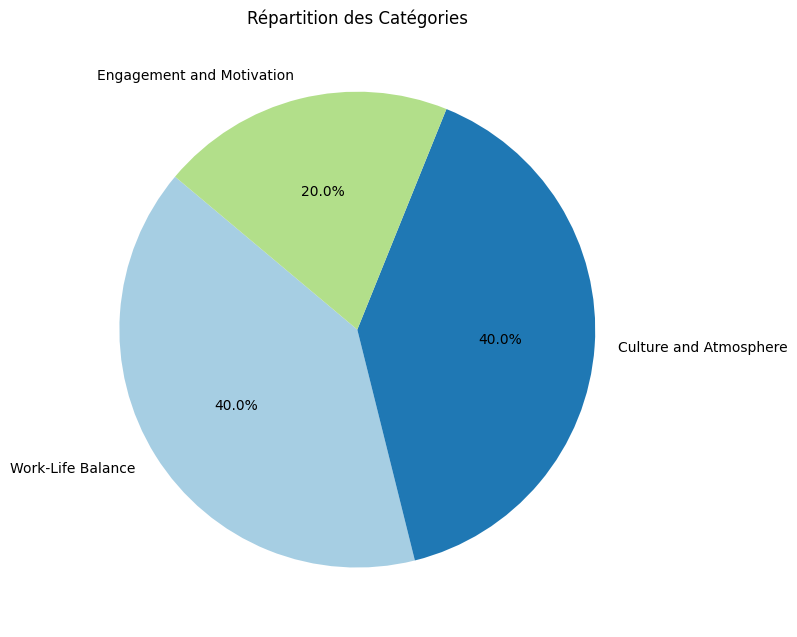

In [67]:
import matplotlib.pyplot as plt
from collections import Counter

# Exécuter le pipeline de classification
results_classification = classification_pipeline(data, candidate_labels)

# Extraire les catégories prédites
predicted_categories = [result['labels'][0] for result in results_classification]  # La catégorie avec le score le plus élevé

# Compter les occurrences de chaque catégorie
category_counts = Counter(predicted_categories)

# Préparer les données pour le graphique
classification_categories = list(category_counts.keys())
counts = list(category_counts.values())

# Créer un graphique en camembert
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=classification_categories, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Répartition des Catégories")
plt.tight_layout()
plt.show()

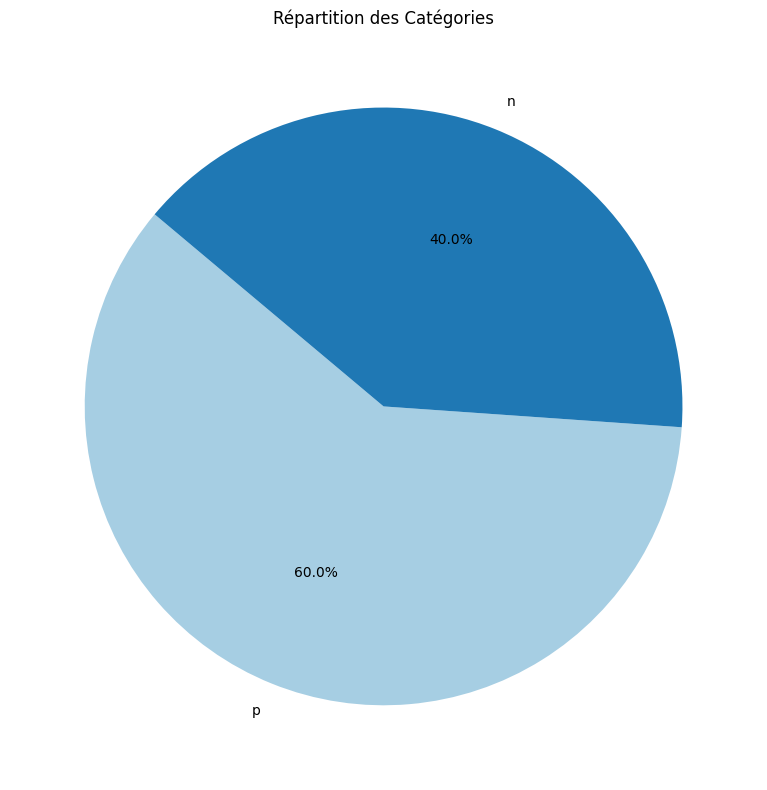

In [40]:
import matplotlib.pyplot as plt
from collections import Counter

# Exécuter le pipeline de classification
results_sentiment = sentiment_pipeline(data)

# Extraire les catégories prédites
predicted_sentiment = [result['label'][0] for result in results_sentiment]  # La catégorie avec le score le plus élevé

# Compter les occurrences de chaque catégorie
sentiment_counts = Counter(predicted_sentiment)

# Préparer les données pour le graphique
sentiment_categories = list(sentiment_counts.keys())
counts = list(sentiment_counts.values())

# Créer un graphique en camembert
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=sentiment_categories, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Répartition des Catégories")
plt.tight_layout()
plt.show()

In [ ]:
df4

dict_keys(['Work-Life Balance', 'Culture and Atmosphere', 'Engagement and Motivation'])

### Résumé

In [138]:
# Use a pipeline as a high-level helper
from transformers import pipeline

summarization_pipeline = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6", device=0)

Device set to use cpu


In [48]:
summarization_pipeline(comments_by_category['Vision and Values'])

[]

In [47]:
from transformers import pipeline

# Initialiser le pipeline de résumé
summarization_pipeline = pipeline("summarization", model="facebook/bart-large-cnn")

# Générer un résumé pour chaque catégorie
summaries_by_category = {}

for category, grouped_comments in comments_by_category.items():
    # Combiner tous les commentaires d'une catégorie en un seul texte
    combined_comments = " ".join(grouped_comments)
    
    # Résumer les commentaires
    if len(combined_comments) > 0:  # Vérifier que la catégorie contient des commentaires
        summary = summarization_pipeline(combined_comments, max_length=100, min_length=30, do_sample=False)
        summaries_by_category[category] = summary[0]['summary_text']
    else:
        summaries_by_category[category] = "Pas de commentaires pour cette catégorie."

# Afficher les résumés par catégorie
for category, summary in summaries_by_category.items():
    print(f"Catégorie: {category}")
    print(f"Résumé: {summary}")
    print("\n")

Error while downloading from https://cdn-lfs.hf.co/facebook/bart-large-cnn/40041830399afb5348525ef8354b007ecec4286fdf3524f7e6b54377e17096cb?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27model.safetensors%3B+filename%3D%22model.safetensors%22%3B&Expires=1743079833&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0MzA3OTgzM319LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9mYWNlYm9vay9iYXJ0LWxhcmdlLWNubi80MDA0MTgzMDM5OWFmYjUzNDg1MjVlZjgzNTRiMDA3ZWNlYzQyODZmZGYzNTI0ZjdlNmI1NDM3N2UxNzA5NmNiP3Jlc3BvbnNlLWNvbnRlbnQtZGlzcG9zaXRpb249KiJ9XX0_&Signature=tht6Nm3V1htuKuejH8zxK1WoNL1yo3IyJ6T0RA7D6rOg9MIYISXnW7-bl%7EVaqtPAxJ0YbVlOkh5rNxgAWegnL3H95j3UQy2V7nbG89WVFULUJCA7vPgp7ChygPvixaQgt%7E1zQTvRbdpGkNyEWyBpGxpv-ePjXhS137UV5A87VxufyUg6hqaAOOrNPNXcEWKpasWybkSa0wCuLyqUnT1LENx6iIIcn-m83DN30qnCRNI0trzBVJw4jKKIJ1RpxAqJ7t6ydqQXM5aE0eJ%7EhQUXneq5PpQFgm2wpkSDgkVSRmVt6-6WNqaz4xUF6SMNy6ci0S97wYqXjLZfN86YsKQhjg__&Key-Pair-Id=K3RPWS32NSSJCE: HTTPSConnection

Catégorie: Work-Life Balance
Résumé: Everything is good at home. Everything is good. Work From Home Policy is our new work-from-home policy. Read more at CNN.com/WorkFromHome.


Catégorie: Culture and Atmosphere
Résumé: The increment policy - i think no matter how good/bad you are at work. Percentage of increment is pre-decided & will not change once they informed you about it. We should be allowed to take work from home at least for 2 weeks to celebrate festivals and special occasions with family.


Catégorie: Engagement and Motivation
Résumé: Team management is responsible for the performance of the U.S. women's soccer team. Team management is also responsible for Team USA's performance in the 2014 World Cup.




In [54]:
sentiment_pipeline(df2['Commentaire'].tolist())

df2['Sentiment'] = [result['label'] for result in sentiment_pipeline(df2['Commentaire'].tolist())]

In [ ]:
from transformers import pipeline
import openai

api_key = "/TAQjyBklMetRPIWjUHbFV/SxelHKeWnbfqdZmxVF3A=" # key Julian
api_url = "http://px101.prod.exalead.com:8110/v1"
client = openai.OpenAI(api_key=api_key, base_url=api_url)


# Initialiser le pipeline de génération de texte

# Fonction pour générer une recommandation à partir d'un résumé
def generate_recommendation(summary):
    prompt = f"There is a summary of feedbacks of employee about different field of there place in the company: {summary}\n \
    You are a great manager, your job is to give a recommendation or an area for improvement based on this summary."
    
    response = client.chat.completions.create(
                model="mistralai/Mistral-Small-24B-Instruct-2501",
                messages=[{"role": "user", "content": prompt}],
                max_tokens=1500,
                temperature=0
            )
    return response.choices[0].message.content

# Appliquer la fonction pour chaque résumé
summaries_by_topic['Recommendation'] = summaries_by_topic['Summary'].apply(generate_recommendation)

# Afficher le DataFrame avec les recommandations
print(summaries_by_topic)

                            Topic  \
0       Benefits and Compensation   
1          Culture and Atmosphere   
2       Management and Leadership   
3  Resources and Work Environment   
4               Work-Life Balance   

                                             Summary  \
0   The increment policy - i think no matter how ...   
1   "Everything is good. Everything is good," say...   
2   Management should foster a culture of trust b...   
3   The first and foremost is the paycheck, the e...   
4   All of us should keep in mind that we work fo...   

                                      Recommendation  
0  Based on the summary of employee feedback, her...  
1  Based on the provided summary, here are some r...  
2  Based on the summary of employee feedback, her...  
3  Based on the summary of employee feedback, her...  
4  Based on the summary of employee feedback, her...  


In [ ]:
summaries_by_topic

,Topic,Summary,Recommendation
0,Benefits and Compensation,The increment policy - i think no matter how ...,"Based on the summary of employee feedback, her..."
1,Culture and Atmosphere,"""Everything is good. Everything is good,"" say...","Based on the provided summary, here are some r..."
2,Management and Leadership,Management should foster a culture of trust b...,"Based on the summary of employee feedback, her..."
3,Resources and Work Environment,"The first and foremost is the paycheck, the e...","Based on the summary of employee feedback, her..."
4,Work-Life Balance,All of us should keep in mind that we work fo...,"Based on the summary of employee feedback, her..."


: 

In [33]:
import os 
import torch
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
summarization_pipeline = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6", device=device)


def summarize(comments, batch_size=32):
    comments = [str(c) for c in comments if c and isinstance(c, str) and len(c.strip()) > 0]
    summaries = []

    for i in range(0, len(comments), batch_size):
        batch = comments[i:i+batch_size]
        combined = " ".join(batch)
        result = summarization_pipeline(combined, max_length=100, min_length=30, do_sample=False)
        summaries.append(result[0]['summary_text'])

    final_input = " ".join(summaries)
    final_result = summarization_pipeline(final_input, max_length=120, min_length=40, do_sample=False)

    return final_result[0]['summary_text']


df5 = pd.read_excel('data/Test.xlsx', header=None)

summarize(df5[0].tolist())

Device set to use cuda


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [32]:
df5

,0
0,Everything is good
1,The increment policy - i think no matter how g...
2,Work From Home Policy
3,Team management
4,The policies for people working outside of the...
...,...
506,Nothing to dislike about 3DS.
507,The fake urgency and bossing of people is rega...
508,Gehälter wachsen langsamer als die Inflation.
509,Auf Grund unserer Größe haben wir teils behörd...
